In [1]:
import random
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm

import model

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [2]:
u= 2

v_sigma = 1
w_sigma = 0.25

start_x = 0
start_y = 0
start_z = 100


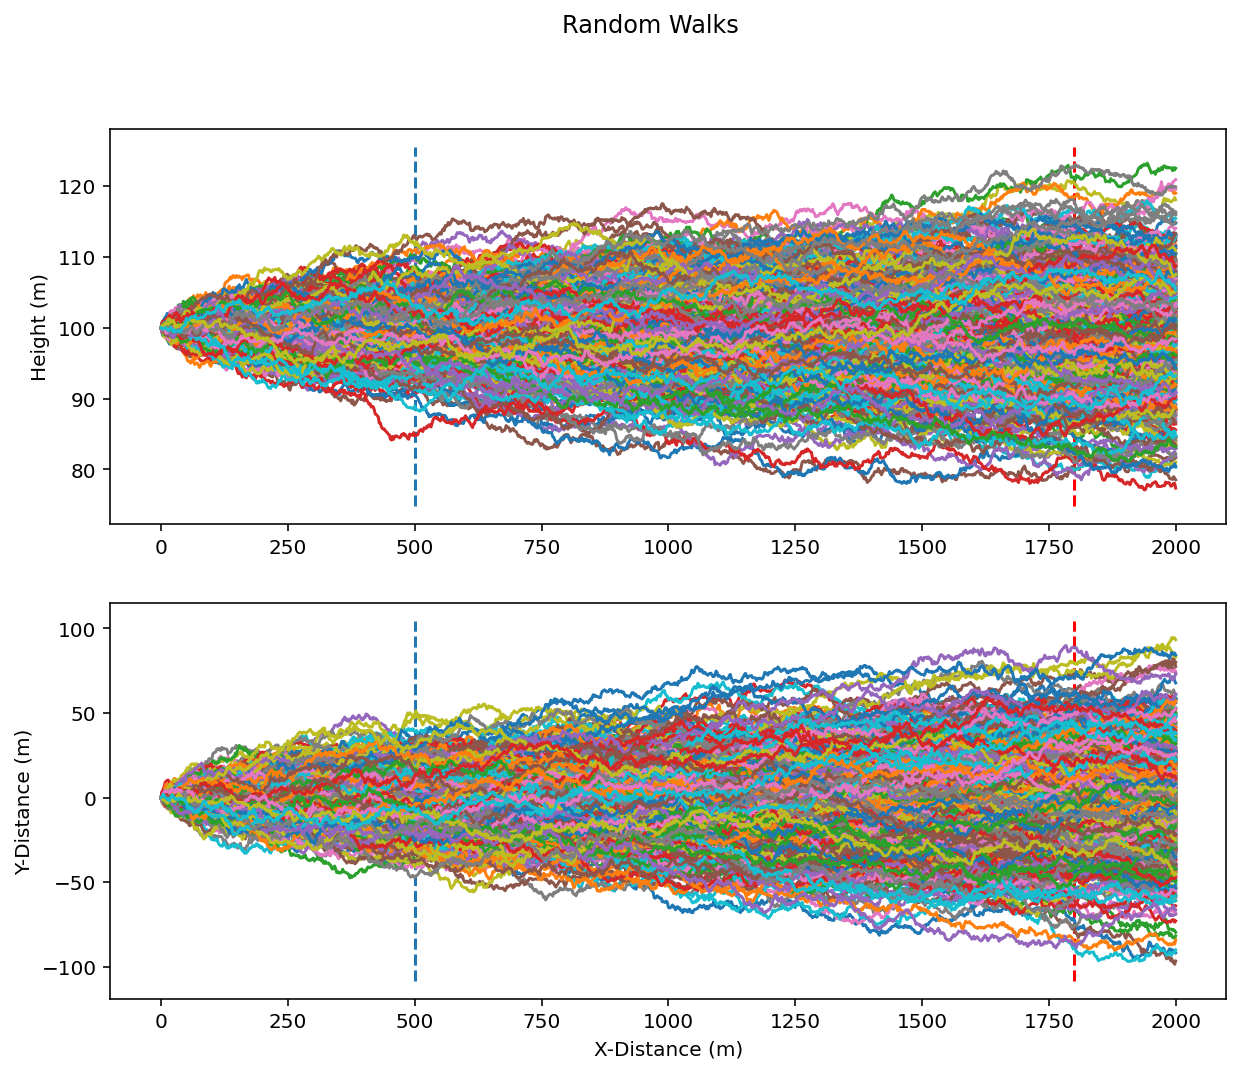

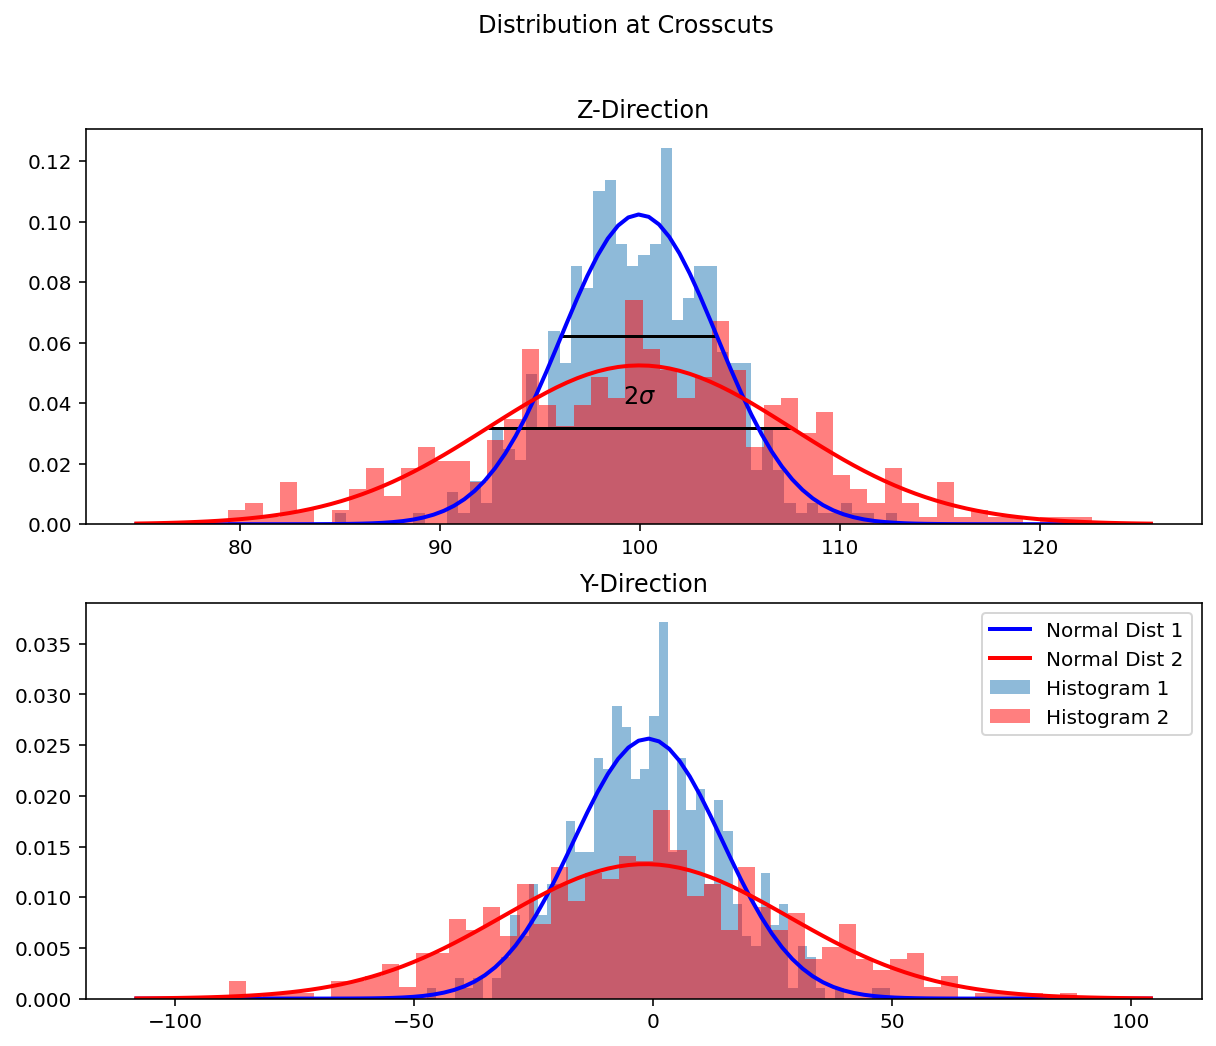

In [3]:
n_walks = 500
x,y,z =model.calculate_trajectories(start_y,start_z,u,v_sigma,w_sigma,n_walks)

model.plot_trajectory(x,y,z,500,n_walks)

In [6]:
# This should only be run once and might take a few moments to run
PlumeParam, NewPlume = model.init_GaussianPlume()

TypeError: Input z must be 2D, not 4D

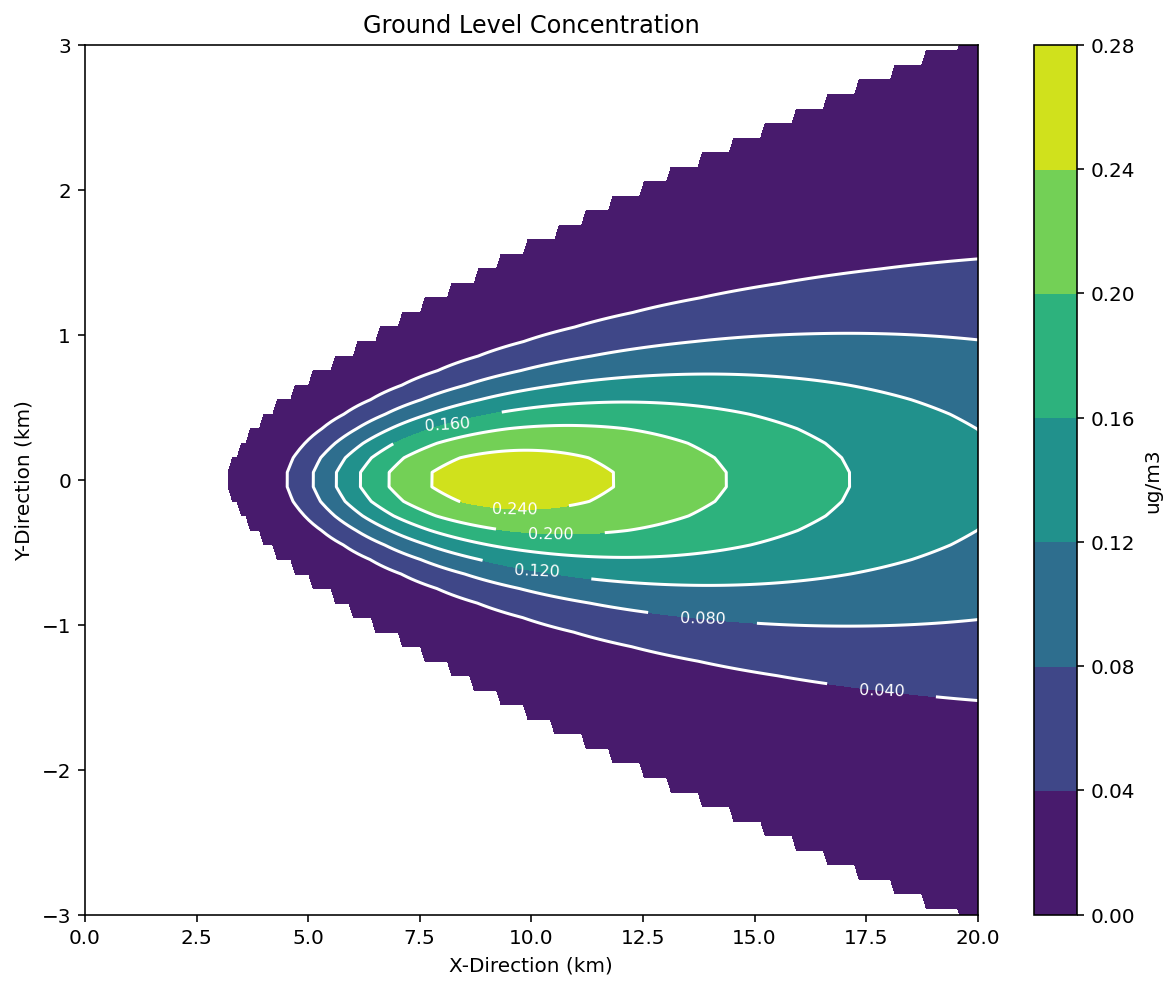

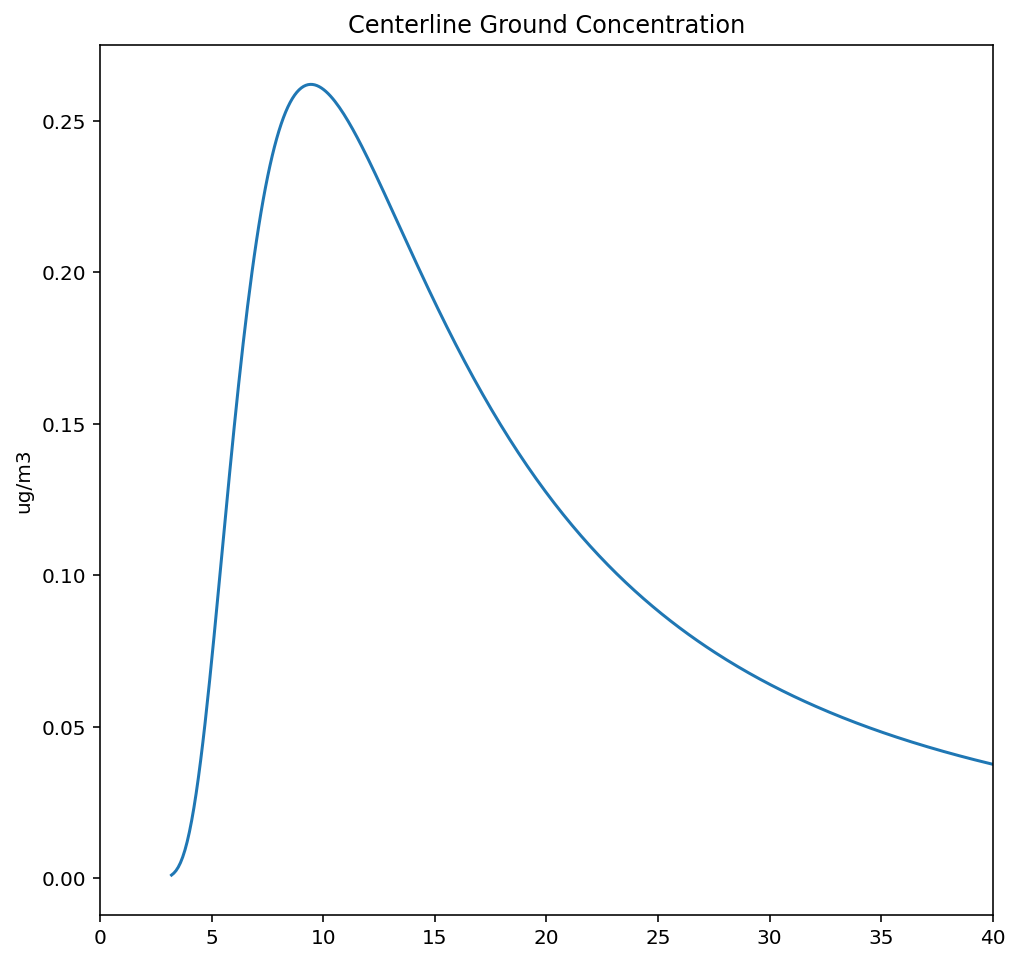

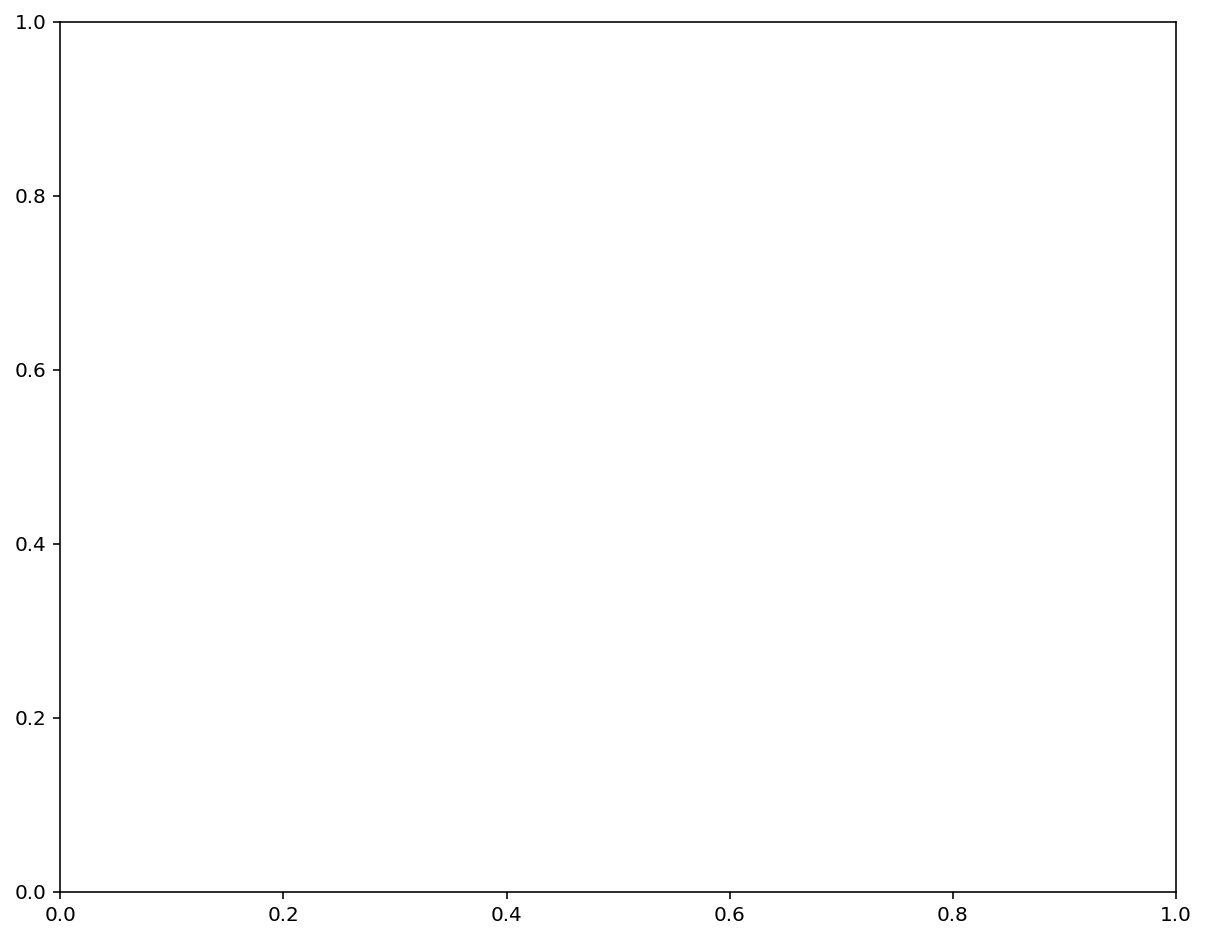

In [7]:
Q = 1000  # Release rate (mg/s)
H = 200   # The Effective Stack Height (m)

u=2       # Windspeed in m/s (u=2 was original value)

# Select the Stability Class Here:
stability_class = 'E'  # Options are: A (very unstable), B (moderately unstable), 
                       #             C (neutral), D (stable), E (very stable)
    
    
X_CrossS = 5    # Location of crossection in X in km  (5 was inital value)
Y_CrossS = 0    # Location of crossection in Y in km  (0 was inital value, this is the centerline)
Z_CrossS = 100  # Height of crossection in Z in m  (100 was inital value, this is inital stack height) 


C =model.calc_GaussianPlume(Q,H,u,stability_class,PlumeParam)
NewPlume=model.plot_GaussianPlume(C, X_CrossS, Y_CrossS, Z_CrossS, PlumeParam)



In [218]:
# Calculate Gaussian Plume







#Iy = {'A':0.5, 'B':0.3, 'C': 0.15, 'D': 0.1, 'E':0.05}
#Iz = {'A':0.3, 'B':0.12, 'C': 0.07, 'D': 0.05, 'E':0.015}

#xv, yv, zv = np.meshgrid(x, y, z)

#sigma_v = xv*1000 * Iy[stability_class]
#sigma_z = xv*1000 * Iz[stability_class]

#C = Q/u*1/(np.pi*sigma_v *sigma_v)* np.exp(-(yv*1000)**2/(2*sigma_v**2))*np.exp(-H**2/(2*sigma_z**2))
#C = Q/u*1/(np.pi*sigma_v *sigma_v)* np.exp(-(yv*1000)**2/(2*sigma_v**2))*np.exp(-(zv-H)**2/(2*sigma_z**2))

#C=np.where(C < 1e-6, np.nan, C)

 


In [243]:
def calc_GaussianPlume(Q,H,u,stability,Param):
    x,y,z,xv, yv, zv, Iy, Iz = Param
    sigma_v = xv*1000 * Iy[stability]
    sigma_z = xv*1000 * Iz[stability]

    #C = Q/u*1/(np.pi*sigma_v *sigma_v)* np.exp(-(yv*1000)**2/(2*sigma_v**2))*np.exp(-H**2/(2*sigma_z**2))
    C = Q/u*1/(np.pi*sigma_v *sigma_v)* np.exp(-(yv*1000)**2/(2*sigma_v**2))*np.exp(-(zv-H)**2/(2*sigma_z**2))

    C=np.where(C < 1e-6, np.nan, C)
    
    return C


In [235]:
def init_GaussianPlume():
    x = np.linspace(0, 40, 400)+.001
    y = np.linspace(-20, 20, 400)+.001
    z = np.linspace(0, 1000, 400)+.001
    Iy = {'A':0.5, 'B':0.3, 'C': 0.15, 'D': 0.1, 'E':0.05}
    Iz = {'A':0.3, 'B':0.12, 'C': 0.07, 'D': 0.05, 'E':0.015}

    xv, yv, zv = np.meshgrid(x, y, z)
    
    NewPlume = True
    return (x,y,z,xv, yv, zv, Iy, Iz),NewPlume

In [250]:

def plot_GaussianPlume(C, XCut, YCut, ZCut, Param):
    x,y,z,xv, yv, zv, Iy, Iz = Param
    
    # translate X,Y,Z to nearest index values 
    X = np.abs(x-XCut)
    ix0 =  np.where( X == X.min() )

    X = np.abs(z-ZCut)
    iz0 =  np.where( X == X.min() )

    X = np.abs(y-YCut)
    iy0 =  np.where( X == X.min() )
    
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(10, 8)

    cf=ax.contourf(x,y,C[:,:,0]*1000)
    cf2=ax.contour(x,y,C[:,:,0]*1000,colors = 'w')
    ax.clabel(cf2, inline=True, fontsize=8)
    ax.set_ylim((-3,3))
    ax.set_xlim((0, 20))
    ax.set_title('Ground Level Concentration')
    ax.set_ylabel('Y-Direction (km)')
    ax.set_xlabel('X-Direction (km)')
    fig.colorbar(cf, ax=ax, label = 'ug/m3')


    fig2, ax = plt.subplots(1, 1)
    fig2.set_size_inches(8, 8)

    ax.plot(x,np.squeeze(C[iy0,:,0]*1000))
    ax.set_xlim((0, 40))
    ax.set_title('Centerline Ground Concentration')
    ax.set_ylabel('ug/m3')


    fig3, ax = plt.subplots(1, 1)
    fig3.set_size_inches(10, 8)

    cf2=ax.contour(x,y,(C[:,:,40]*1000),[0.05,0.1,0.5,1,5,10,20,50,100],colors='k')
    ax.clabel(cf2, inline=True, fontsize=8)
    fig.colorbar(cf2, ax=ax, label = 'ug/m3')

    ax.set_xlim((0, 40))
    ax.set_ylim((-3, 3))
    ax.set_title('Concentration Height = %d m' % (H))
    ax.set_xlabel('X-Direction (km)')
    ax.set_ylabel('Y-Direction (km)')

    # Simple contourplot with Y-Z cut
    
    fig4, ax = plt.subplots(1, 1)
    fig4.set_size_inches(10, 8)
    #cf3=ax.contourf(y,z,np.squeeze(C[:,ix0,:]*1000).T)
    cf2=ax.contour(y,z,np.squeeze(C[:,ix0,:]*1000).T)
    fig.colorbar(cf2, ax=ax, label = 'ug/m3')
    ax.clabel(cf2, inline=True, fontsize=8)
    ax.set_xlim((-3, 3))
    ax.set_ylim((0, 500))
    ax.set_ylabel('Height (m)')
    ax.set_xlabel('Y-Direction (km)')
    ax.set_title('Concentrations for Crosscut at X = %d km' % (XCut))

    # Simple contourplot with X-Z cut
    fig5, ax = plt.subplots(1, 1)
    fig5.set_size_inches(10, 8)
    cf2=ax.contour(x,z,np.squeeze(C[iy0,:,:].T*1000),[0.05,0.1,0.5,1,5,10,20,50,100])
    fig.colorbar(cf2, ax=ax, label = 'ug/m3')
    ax.clabel(cf2, inline=True, fontsize=8)

    ax.set_ylabel('Height (m)')
    ax.set_xlabel('Y-Direction (km)')
    ax.set_title('Concentrations for Crosscut at X = %d km' % (XCut))

    return GP_init
